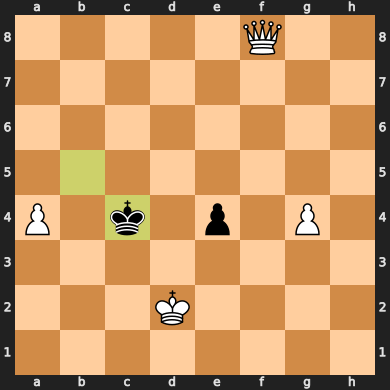

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *
from mcts import *


env.board

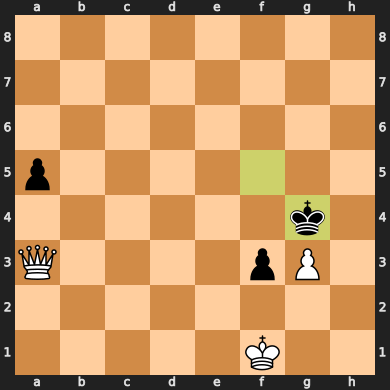

In [ ]:
env.reset()

env.board

In [ ]:
model = DeepQ(env, dropout_rate=0.2, n_channels=128, n_residual=5)

model.model = keras.models.load_model('pretrained')
model.target_model = keras.models.load_model('pretrained')

model.head.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 8, 8, 128)    18560       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 8, 128)    512         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 8, 8, 128)    0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
if True:
    model.pre_train(
            max_epoch= 200*32, 
            batch_size = 128,    
            max_steps_per_episode = 30, 
            learning_rate = 1e-5,
            update_target = 1000000000000000,
            jupyter=True,
            random_best_action=0.3,
            n_top_move= 3, 
            name='pretrained',
            length_train_set=256*4,
            length_test_set = 32*4,
        )

In [5]:
%%time
model.predict_move_to_play_MCTS(env,10)

Wall time: 622 ms


'a3a2'

In [7]:
import warnings
warnings.filterwarnings('ignore')
bs = 32


model.train(
    max_epoch = 3000, 
    epsilon_random_frames = 0,
    epsilon_greedy_frames = 5,
    epsilon = 0.01,
    epsilon_min = 0.,
    batch_size = bs,
    max_steps_per_episode = 50,
    learning_rate=1e-3,
    MCTS_iterations=10,
    name='model_long_training',
    update_target=bs*2,
    elo = 1
    )

New game, with the following starting board : 
 . . . . . . R .
. . . k . . . .
. . . . . . . .
. . . . . . p .
. . . . . p . .
. . . . . . r .
. . . . . . . .
. . . . . K . .


100%|██████████| 49/49 [00:42<00:00,  1.16it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . b . . . .
. . . . . . . R
. . . . . . . .
. p . . K . . .
. . . . . P . .
. k . . . . . .


100%|██████████| 49/49 [00:39<00:00,  1.25it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . p . P
. . . . . k . .
. . K . . . . .
. . . . . . . .
. . . . . . . .
b . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:42<00:00,  1.15it/s]


New game, with the following starting board : 
 . . . R . . . .
. . . . . . . .
. . . . . . K .
r . . . . . . .
. . . . . . . .
. b . . . . . .
. . . . . k . .
. . . . . . . .


100%|██████████| 49/49 [00:43<00:00,  1.14it/s]


New game, with the following starting board : 
 . . . . . . . .
p . . . . . . .
. . . . . . . .
. . . . p . . .
. . . k . . p .
. . . . . . . .
. . . . q . . .
. . K . . . . .


  2%|▏         | 1/49 [00:01<01:20,  1.67s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . . . . r
. P . . . . p .
. . . . P . . .
. . . . K . . .
. . k . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:43<00:00,  1.13it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . b . . . k
. . . . . . . .
. . . . . . . .
. B p . . . . .
p . . . . . . .
. . . . K . . .
. . . . . . . .


100%|██████████| 49/49 [00:43<00:00,  1.13it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . b . .
. . . . n . k .
. . . . . . . .
. . . . K . . .
. . . . . . . q


100%|██████████| 49/49 [00:47<00:00,  1.03it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . . . . r
. . . . . . . k
. . . . . R . .
. . . . . P . .
. . . . . . K .
. . . . . . . .


100%|██████████| 49/49 [00:48<00:00,  1.00it/s]


New game, with the following starting board : 
 . . . . . . . k
. . R . . . . .
. . . . . . . .
. . . . . r . P
. . . . p . . .
. . . . . . . .
. . . . . . K .
. . . . . . . .


100%|██████████| 49/49 [00:49<00:00,  1.01s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . n . K .
p . . . . . . .
P k . . . . . .
. . . . N . . .
. . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:43<00:00,  1.12it/s]


New game, with the following starting board : 
 . . . . . . . .
. . q . . . . .
. . . p . . . .
. . . K . . . .
. . . . . k . .
. . b . . . . .
. p . . . . . .
. . . . . . . .


 47%|████▋     | 23/49 [00:22<00:25,  1.01it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . R .
. . . . . . . .
. . . . . p . .
. . . K . . p .
. P . . . . k .
. . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:44<00:00,  1.10it/s]


New game, with the following starting board : 
 . . . . . b . .
. . . . . . . .
. . K . . . . .
p . . . . . . .
P . . . . k . .
. . . . . . . .
B . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:42<00:00,  1.14it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . . . R
. . . k . . . .
. . . . . . . .
P . K . . . . .
r . . . . . . .


100%|██████████| 49/49 [00:45<00:00,  1.07it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . k
R . . . . . . .
. . . . r . . .
. . . . . . . P
. . . . . . . .
K . . . . . . .
. . . . . . . .


 51%|█████     | 25/49 [00:31<00:29,  1.24s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . k . .
. . . . . . . .
. . . p . . . .
. . p . . . . .
. r K . . . . .
. . . . . . . .
r . . . . . . .


100%|██████████| 49/49 [00:47<00:00,  1.04it/s]


New game, with the following starting board : 
 . . . . . . . .
. . . p . k . .
. . . . . p . .
. . . q . . . .
. . . . . R . .
. . . . . . K .
. . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:47<00:00,  1.03it/s]


New game, with the following starting board : 
 . . . . . . . .
. k . . . . . .
. B . . . . . .
P . . . . p . .
. . . . . K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


100%|██████████| 49/49 [00:46<00:00,  1.06it/s]


New game, with the following starting board : 
 . . . . . . . .
. n . . . . . .
. . . . k . . .
. . . . . . . .
. . . . . . . .
. . . R . . . .
. . . K . r . .
. . . . . . . .


100%|██████████| 49/49 [00:48<00:00,  1.02it/s]


New game, with the following starting board : 
 . . . . . . . .
p . . . . . . .
. . . . . . . .
. . . . . . . .
. . R . . . . .
. . P k . . . .
. . . . . r . .
. . K . . . . .


100%|██████████| 49/49 [01:26<00:00,  1.76s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . P .
. . . . . P . .
. . . . . . . .
. . . k P . . .
. . . . . . . .
. . K . . . . .
. . . . . . r .


100%|██████████| 49/49 [01:07<00:00,  1.38s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . p . .
. . . . . P . .
R . . b . . . K
. . . . k . . .
. . . . . . . .


100%|██████████| 49/49 [00:52<00:00,  1.06s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . n . . .
. . k . P . . .
. . . . . . . .
. . . K . . . .
. . . . . . . .
. n . . N . . .
. . . . . . . .


100%|██████████| 49/49 [01:05<00:00,  1.33s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
Q . . . . . . .
P . K . p . k .
. . . . . . . .
. . . . . . . .
. . r . . . . .
. . . . . . . .


100%|██████████| 49/49 [01:14<00:00,  1.51s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . . . . . .
. . . . b . . .
. . . . . k . K
. . . . . . . .
. . . . . P . P
. . . . . . . .
. . B . . . . .


100%|██████████| 49/49 [00:57<00:00,  1.18s/it]


New game, with the following starting board : 
 . . . . . . . .
. . . B . . . .
. . . . . . . .
. . . . . . . .
. b . . p k . .
. . . . . . . .
. . . . . P . .
. . . . K . . .


 39%|███▉      | 19/49 [00:24<00:38,  1.29s/it]


KeyboardInterrupt: 

In [ ]:
model.env.board 

In [ ]:
env = Chess_env('8/5P1k/P3K3/8/3B4/8/8/8 w - - 1 78')
env.board

In [ ]:
model.predict_move_to_play_MCTS(model.env, white=True)

In [ ]:
m = MCTS(model,env, {'num_simulations':100})
x = m.run(env.board_feat.board, 1)

In [ ]:
stockfish = Stockfish(path="C:/Users/Philippe/Downloads/stockfish_13_win_x64_avx2/stockfish_13_win_x64_avx2")


In [ ]:

n_won = 0
for _ in range(100):
    _ = env.reset()
    for i in tqdm(range(150)):

        if i%2 ==0:
            action = model.predict_move_to_play_MCTS(2,env,100)
        else:
            stockfish.set_elo_rating(100)
            stockfish.set_fen_position(env.board.fen())
            action = stockfish.get_best_move()
        _,_,done,_ = env.step(action)


        if done:
            if i%2 == 0:
                print("WON")
                n_won += 1
            else:
                print("LOST")
            break
        
        

In [ ]:
_=env.reset()

In [ ]:
env.board

In [ ]:
stockfish.set_fen_position(env.board.fen())

stockfish.get_evaluation()

In [ ]:
model.predict_move_to_play_MCTS(2,env,10)

In [ ]:
fen_mirror = reverse_fen(env.board.fen()).split(' ')
fen_mirror[1] = 'w'
fen_mirror = fen_mirror[0] + ' ' + fen_mirror[1] + ' ' + fen_mirror[2] + ' ' + fen_mirror[3] + ' ' + fen_mirror[4] + ' ' + fen_mirror[5] + ' ' 

env_mirror = Chess_env(fen_mirror)
env_mirror.board

In [ ]:
model.predict_move_to_play_MCTS(2,env,10, white=False)

In [ ]:
X = np.random.randn(5)
X

In [ ]:
np.random.dirichlet([0.3] * 5)